### Viz of different classification datasets using Force Directed Graph on DistanceMatrix
* Concentric n-dimen spheres

In [1]:
import numpy as np

In [94]:
# Generating n-dimen concentric spheres data
def generateNDSpheres(N=3, C=3, M_C=5000):
    # N is number of dimensions
    # C is number of classes
    # M_C is number of examples per class
    M = C*M_C
    X = np.zeros((M,N))
    y = np.zeros(M)
    for c in range(C):
        R = 100*(c+1)
        aggSum = np.zeros(M_C)
        for n in range(N):
            X2 = None
            if n == N-1:
                X2 = (R*R - aggSum)
            else:
                X2 = np.multiply((R*R-aggSum), np.random.rand(M_C))
            aggSum+=X2
            X[c*M_C:(c+1)*M_C,n] = np.multiply(2*np.random.randint(2, size=M_C)-1, np.sqrt(X2))
        y[c*M_C:(c+1)*M_C] = c
    return X,y
C=2
M_C=300
SX, Sy = generateNDSpheres(N=3, C=C, M_C=M_C)

In [95]:
print(SX[:2])
print(Sy[:2])

[[-74.72316946 -49.36702497  44.48982796]
 [ 77.95175753 -23.30179738 -58.1424951 ]]
[ 0.  0.]


<IPython.core.display.Javascript object>


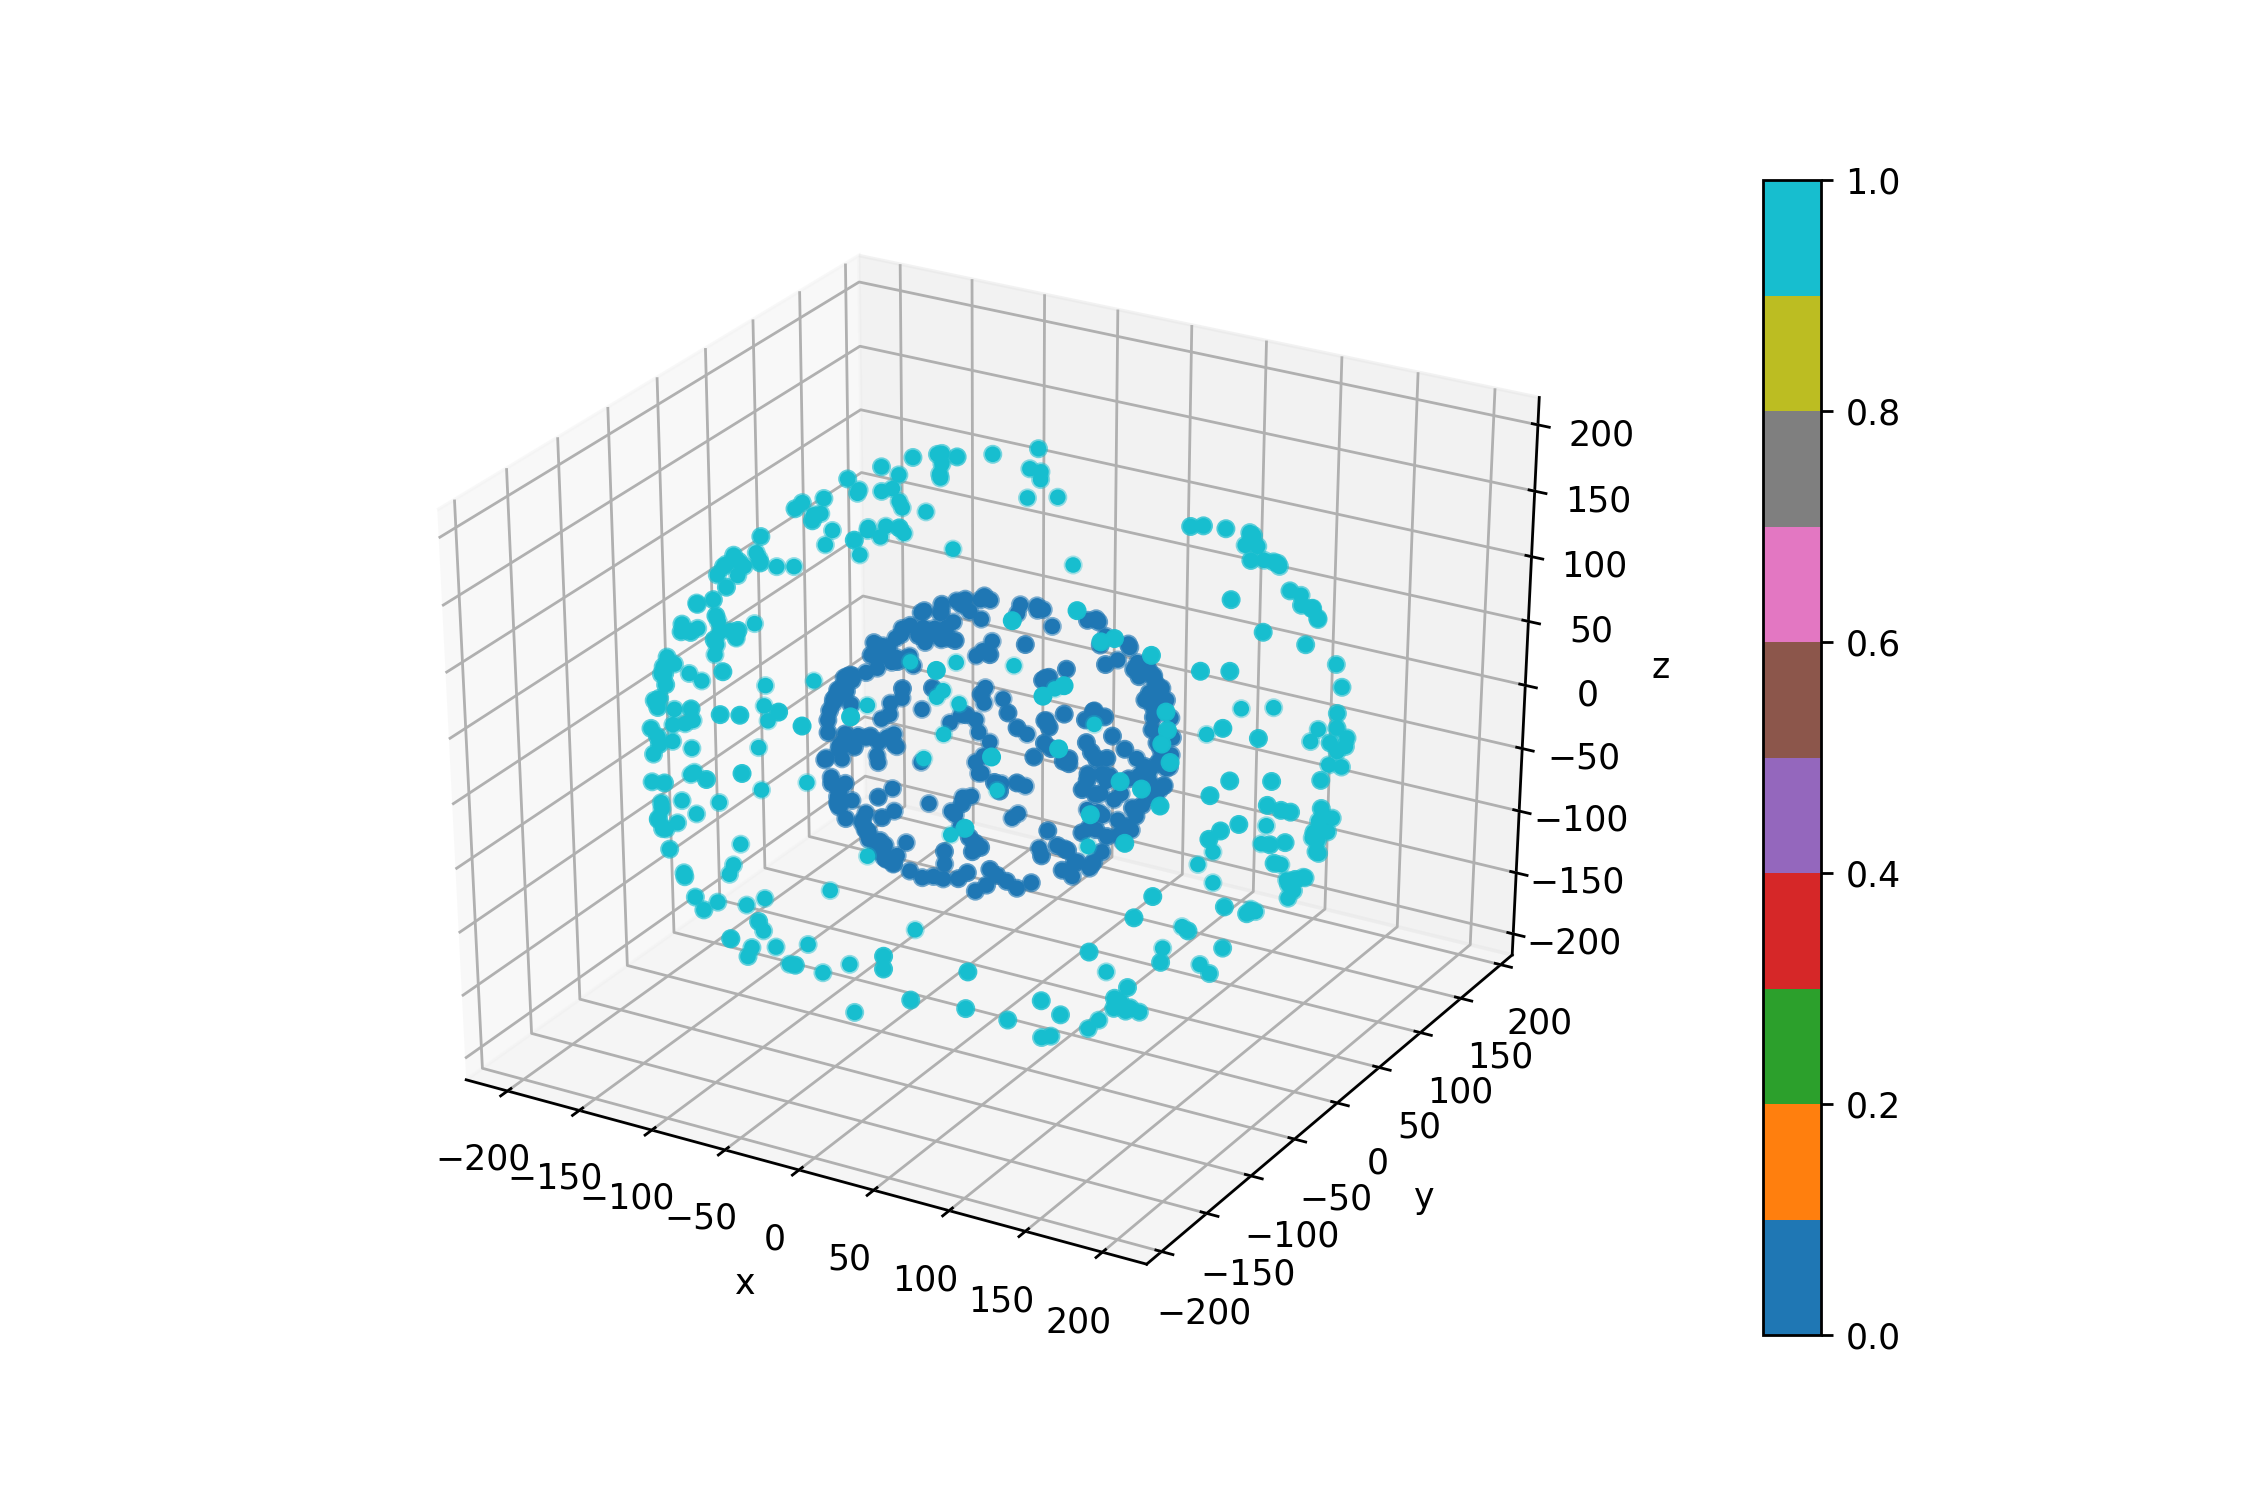

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
def plot3D(X,y):
    %matplotlib notebook
    plt.ion()

    fig = plt.figure(figsize=(9,6))
    chart3d = fig.add_subplot(111, projection='3d')
    c3d = chart3d.scatter(X[:,0], X[:,1], X[:,2], c=y[:], cmap=cm.tab10)
    chart3d.set_xlabel('x')
    chart3d.set_ylabel('y')
    chart3d.set_zlabel('z')
    fig.colorbar(c3d)
    plt.show()
    
plot3D(SX, Sy)

In [97]:
def distanceMatrix(X,Y):
    A, _ = np.shape(X)
    B, _ = np.shape(Y)
    X2 = np.sum(X**2, axis=1).reshape(-1,1)
    Y2 = np.sum(Y**2, axis=1).reshape(-1,1)
    YX = Y.dot(X.T)
    dm = X2 - 2*YX + X2.T
    return dm

In [98]:
dm = distanceMatrix(SX, SX)

In [144]:
import networkx as nx

def genGraph(dm, y, sample_edges=100000):
    N, = y.shape
    G=nx.Graph()
    for i in range(N):
        G.add_node(i)
        #colors[int(y[i,0])]
        weighted_edges = []
    for i in range(N):
        for j in range(i+1,N):
            weighted_edges.append((i,j,1/(dm[i,j]+1e-8)))
    G.add_weighted_edges_from(weighted_edges[0:sample_edges])
    return G

In [145]:
G = genGraph(dm, Sy)

In [146]:
pos = nx.spring_layout(G)

<IPython.core.display.Javascript object>


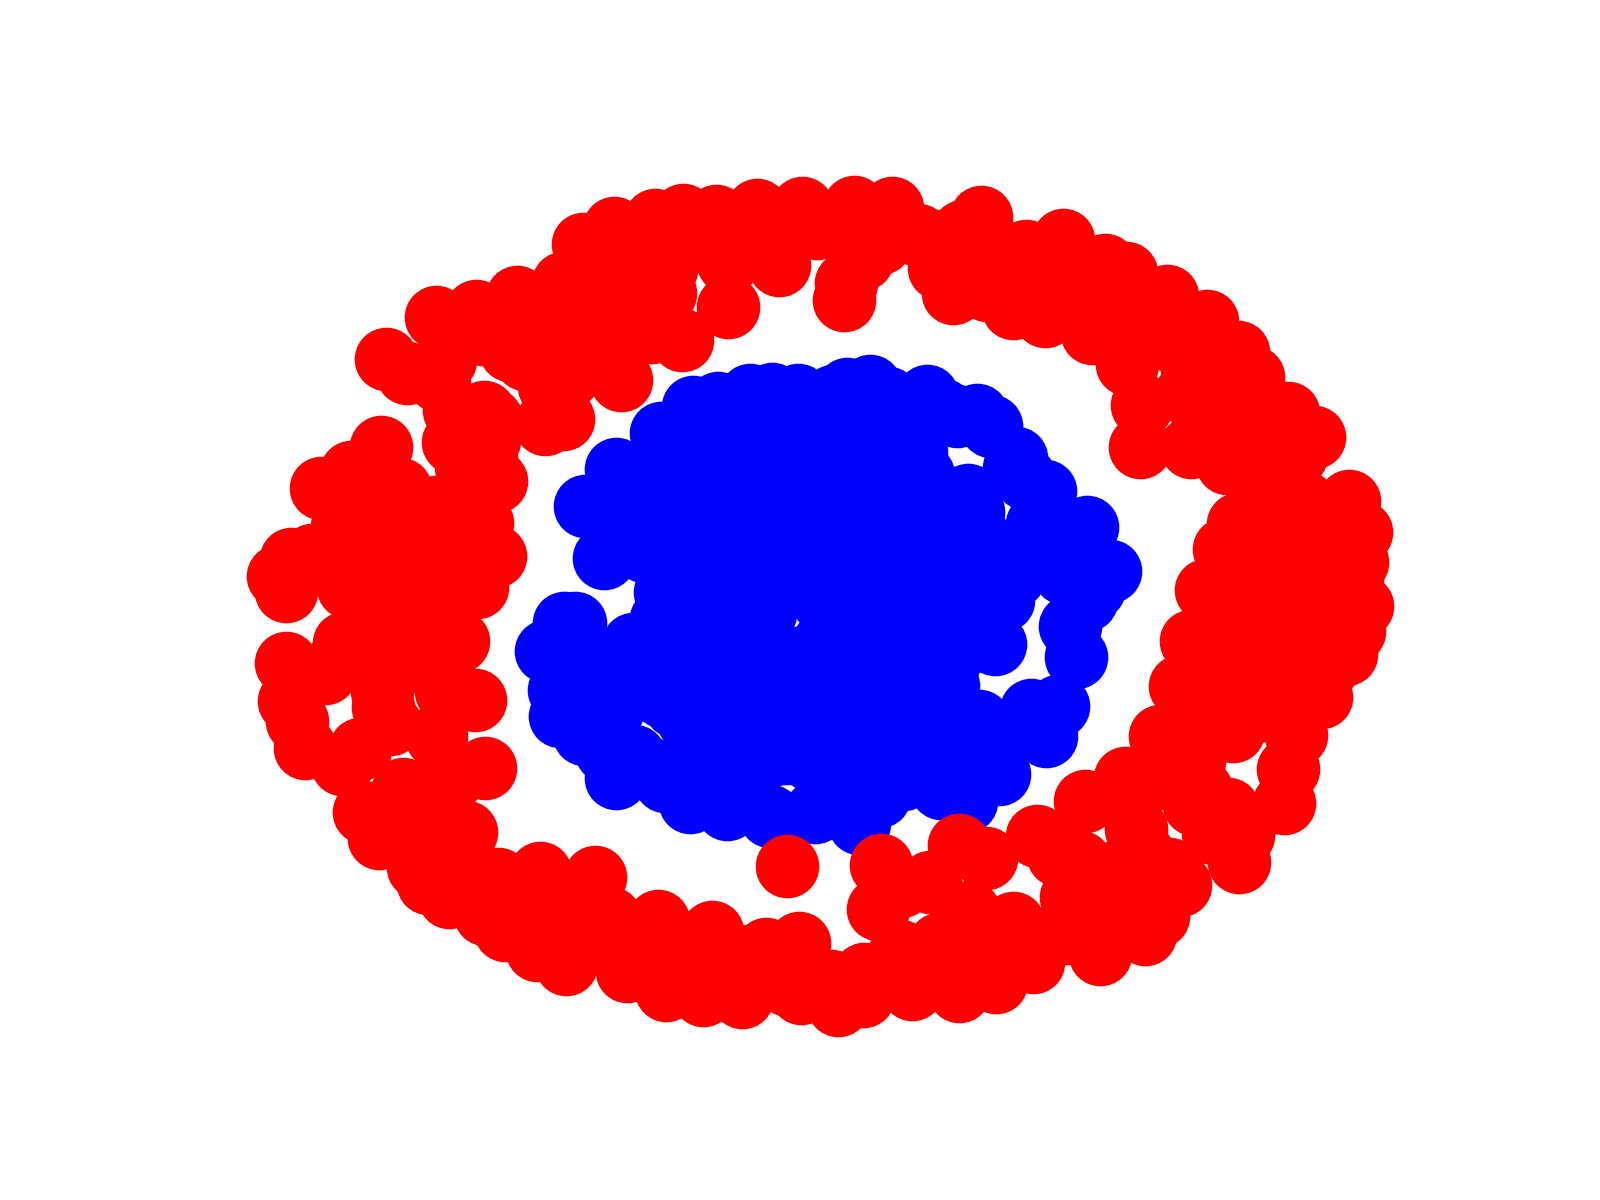

In [147]:
def plotGraph(G, pos, y):
    %matplotlib notebook
    plt.ion()
    colors = ["blue", "red", "green", "yellow", "brown", "pink"]
    N, = y.shape
    for n in range(N):
        nx.draw_networkx_nodes(G,pos, with_labels=False, nodelist=[n], 
                               node_color=colors[int(y[n])])
    plt.axis('off')
    plt.show()
plotGraph(G, pos, Sy)

In [148]:
from sklearn.datasets import make_blobs
BX, By = make_blobs(n_samples=900, centers=3, n_features=4, random_state=0)
print(BX.shape)
print(By.shape)

(900, 4)
(900,)


<IPython.core.display.Javascript object>


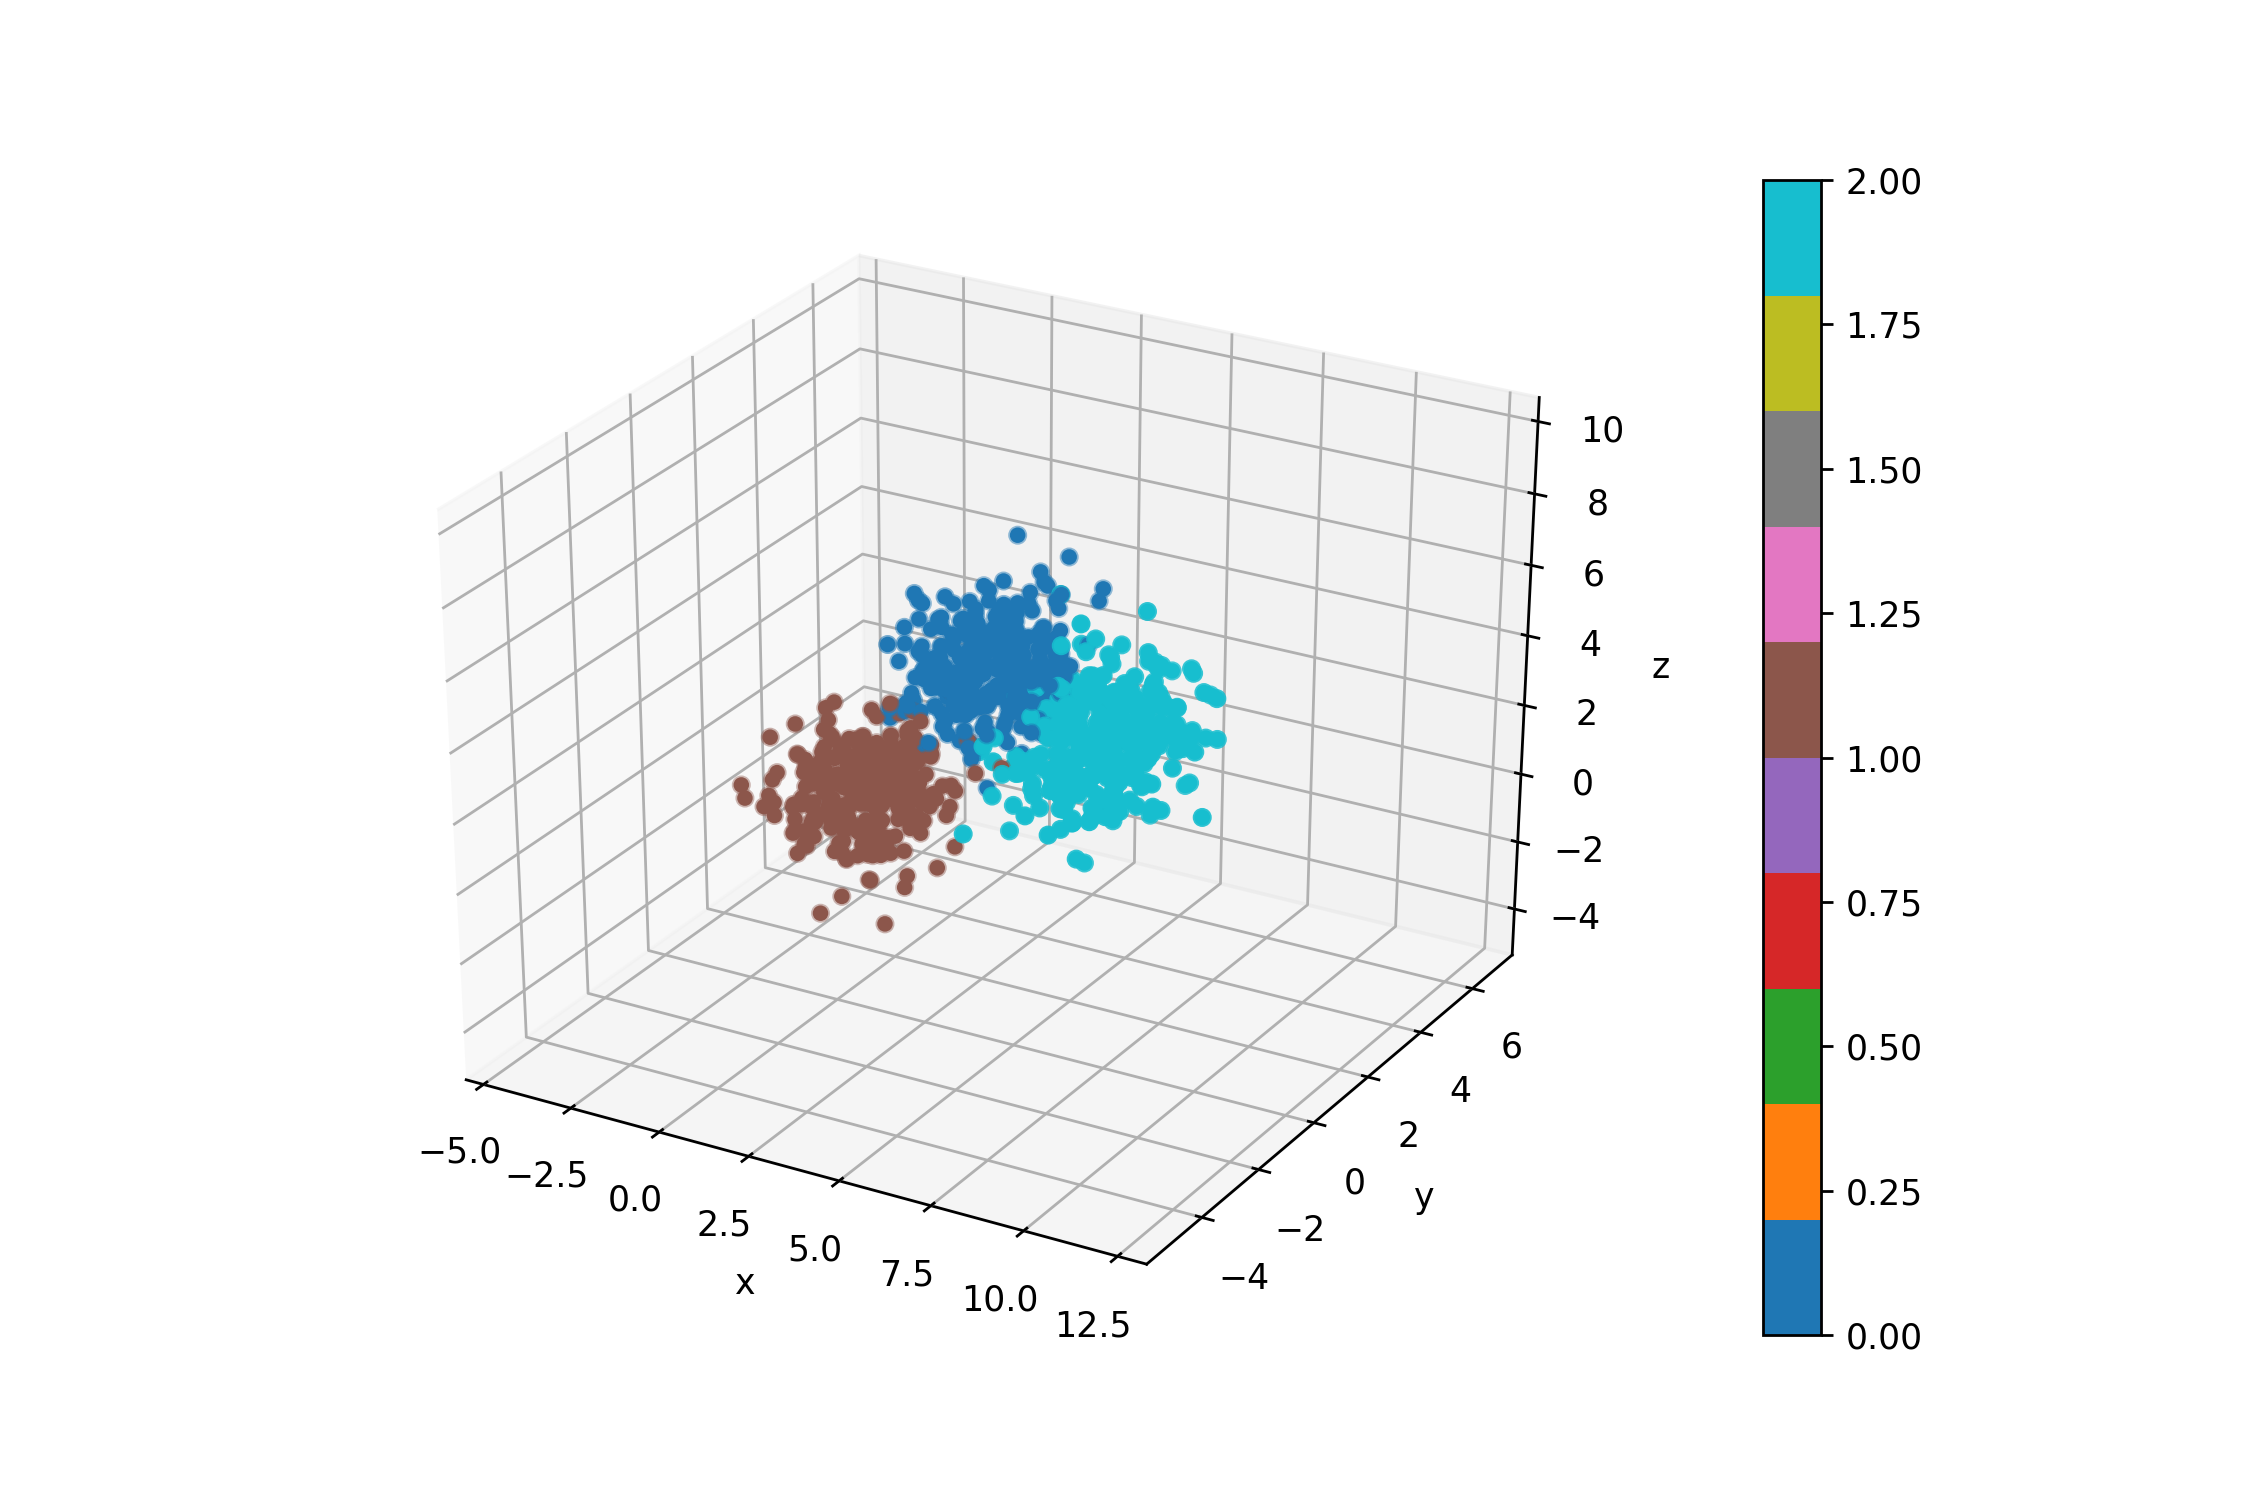

In [149]:
plot3D(BX, By)

In [150]:
dm_blobs = distanceMatrix(BX, BX)

In [151]:
G_blobs = genGraph(dm_blobs, By)

In [152]:
pos_blobs = nx.spring_layout(G_blobs, iterations=100)

<IPython.core.display.Javascript object>


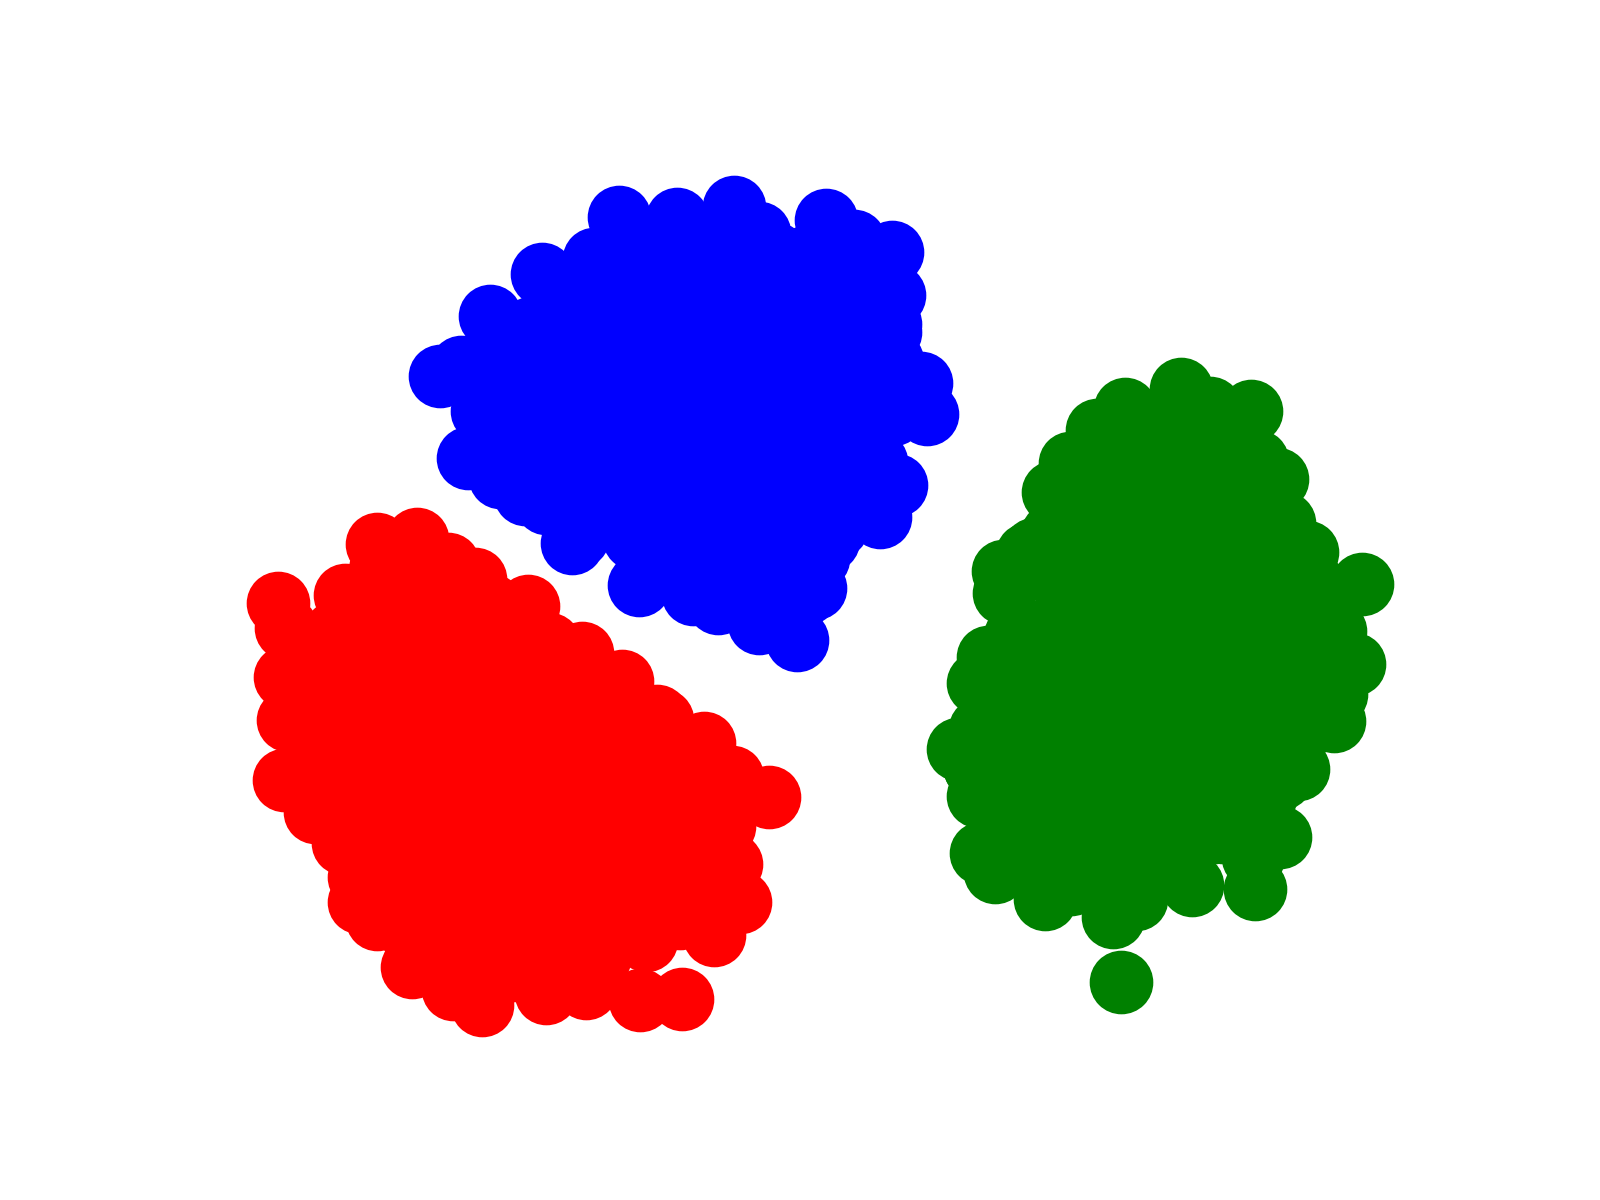

In [153]:
plotGraph(G_blobs, pos_blobs, By)